# Table of contents

- Download latest data
- Retrain model
- Display current squad
- Use model to identify transfers
- Identify playing 11
- Show top performers by position

In [1]:
import pandas as pd
import torch
import numpy as np
import random
from random import shuffle
np.random.seed(17)
random.seed(17)
torch.manual_seed(17)
import wget
import os
import aiohttp
import asyncio
from fpl import FPL
from torch.utils.data import TensorDataset, DataLoader
from player import Player
from team import Team
from data_processor import get_fpl, get_current_squad, get_latest_game_week
from agent import Agent
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
import pytorch_lightning as pl


## Download latest data, train model and save model.

In [2]:
model_type = "linear"
features = ["total_points", "ict_index", "clean_sheets", "saves", "assists", "was_home","goals_scored"]
logger = pl.loggers.TensorBoardLogger(f"lightning_logs/model_comparison/{model_type}")
trainer = pl.Trainer(max_epochs=1, gpus=torch.cuda.device_count(), logger=logger,  callbacks=[EarlyStopping(monitor="val_loss")])
gameweek = get_latest_game_week()
agent = Agent(features, epochs=1, window=6, model_type=model_type, gameweek=gameweek)
await agent.get_data()
await agent.update_model(trainer)

GPU available: True, used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


/home/ajrfhp/anaconda3/envs/test/lib/python3.8/site-packages/pandas/core/frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/home/ajrfhp/Control/Control_FPL/data_processor.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_player_features["total_points"] = all_player_features["total_points"].clip(0, max_player_points)


/home/ajrfhp/Control/Control_FPL/data_processor.py:103: RuntimeWarning: Mean of empty slice.
  avg_minutes_played = player_features[0, -3:].mean()
/home/ajrfhp/anaconda3/envs/test/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



  | Name  | Type        | Params
--------------------------------------
0 | model | LinearModel | 43    
--------------------------------------
43        Trainable params
0         Non-trainable params
43        Total params
0.000     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Validation sanity check:   0%|                                                                    | 0/2 [00:00<?, ?it/s]

Validation sanity check:  50%|██████████████████████████████                              | 1/2 [00:00<00:00,  2.43it/s]

/home/ajrfhp/anaconda3/envs/test/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:322: UserWarning: The number of training samples (15) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: -1it [00:00, ?it/s]

Training:   0%|                                                                       | 0/19 [00:00<00:00, 29127.11it/s]

Epoch 0:   0%|                                                                         | 0/19 [00:00<00:00, 1821.23it/s]

Epoch 0:   5%|███▉                                                                       | 1/19 [00:00<00:02,  6.19it/s]

Epoch 0:   5%|██▊                                                   | 1/19 [00:00<00:02,  6.14it/s, loss=2.79, v_num=62]

Epoch 0:  11%|█████▋                                                | 2/19 [00:00<00:01,  9.04it/s, loss=2.57, v_num=62]

Epoch 0:  16%|████████▌                                             | 3/19 [00:00<00:01, 11.80it/s, loss=2.54, v_num=62]

Epoch 0:  21%|███████████▎                                          | 4/19 [00:00<00:01, 14.44it/s, loss=2.49, v_num=62]

Epoch 0:  26%|██████████████▍                                        | 5/19 [00:00<00:00, 16.95it/s, loss=2.5, v_num=62]

Epoch 0:  32%|█████████████████▎                                     | 6/19 [00:00<00:00, 19.45it/s, loss=2.5, v_num=62]

Epoch 0:  37%|███████████████████▉                                  | 7/19 [00:00<00:00, 21.82it/s, loss=2.46, v_num=62]

Epoch 0:  42%|██████████████████████▋                               | 8/19 [00:00<00:00, 23.94it/s, loss=2.44, v_num=62]

Epoch 0:  47%|█████████████████████████▌                            | 9/19 [00:00<00:00, 26.06it/s, loss=2.41, v_num=62]

Epoch 0:  53%|███████████████████████████▉                         | 10/19 [00:00<00:00, 28.25it/s, loss=2.38, v_num=62]

Epoch 0:  58%|██████████████████████████████▋                      | 11/19 [00:00<00:00, 30.42it/s, loss=2.37, v_num=62]

Epoch 0:  63%|█████████████████████████████████▍                   | 12/19 [00:00<00:00, 32.46it/s, loss=2.37, v_num=62]

Epoch 0:  68%|████████████████████████████████████▎                | 13/19 [00:00<00:00, 34.36it/s, loss=2.35, v_num=62]

Epoch 0:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 36.14it/s, loss=2.34, v_num=62]

Epoch 0:  79%|█████████████████████████████████████████▊           | 15/19 [00:00<00:00, 33.57it/s, loss=2.34, v_num=62]

Epoch 0:  79%|█████████████████████████████████████████▊           | 15/19 [00:00<00:00, 33.50it/s, loss=2.32, v_num=62]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:00,  3.07it/s]

Epoch 0: 100%|█████████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.93it/s, loss=2.32, v_num=62]

Epoch 0: 100%|█████████████████████████████████████████████████████| 19/19 [00:00<00:00, 22.76it/s, loss=2.32, v_num=62]

Player out Roberto Firmino. 0 To double trade  = True 


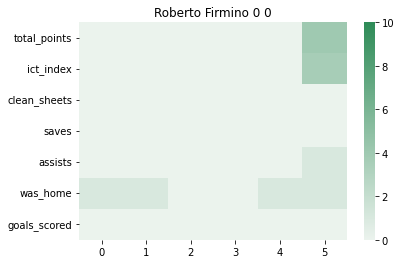

Player in Odsonne Edouard. 5.341590736697691 To double trade  = True 


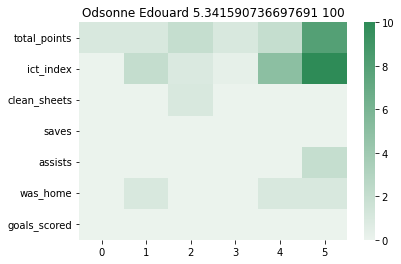

Player out Gylfi Sigurdsson. 0 To double trade  = True 


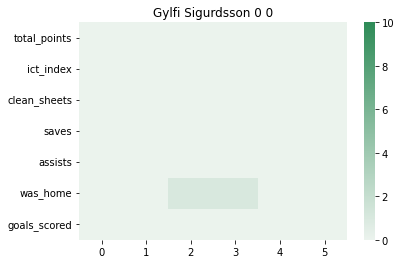

Player in Jadon Sancho. 1.7575494115998982 To double trade  = True 


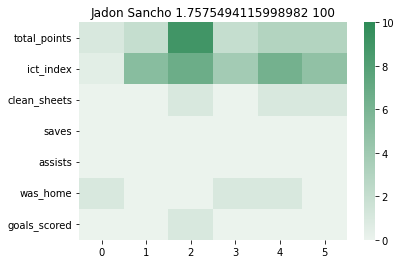

In [3]:
current_squad, non_squad = await get_current_squad(features, window=agent.window, num_players=agent.num_players)
current_squad, non_squad = await agent.get_new_squad(features)
squad = current_squad + non_squad

In [4]:

#agent.get_wildcard_squad(squad, max_weight=1000, visualize=False)

## Show game week id

In [5]:
agent.gameweek

<coroutine object get_latest_game_week at 0x7ff19cce4a40>

## Use model to swap players

## Set playing 11

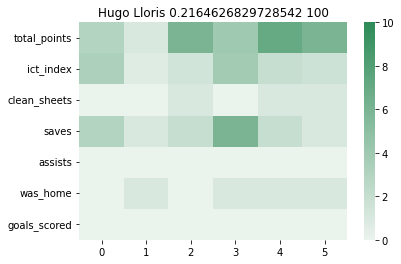

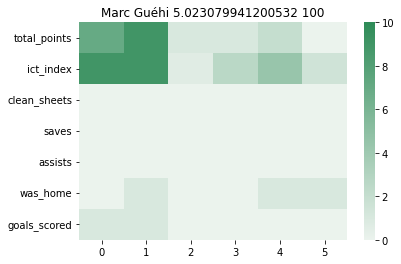

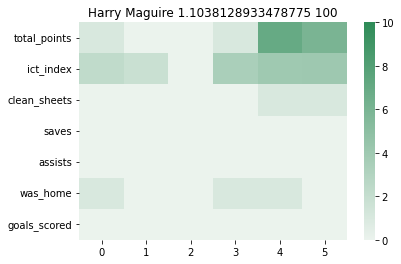

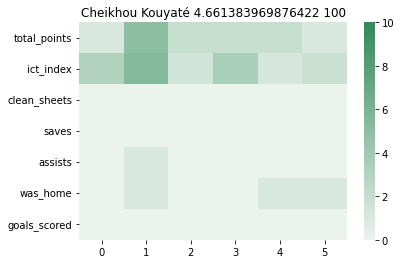

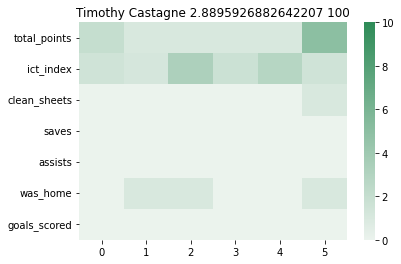

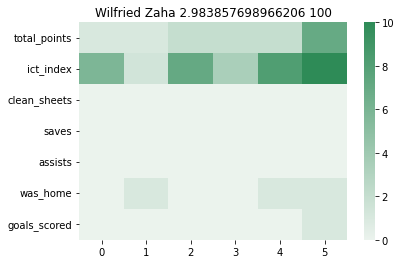

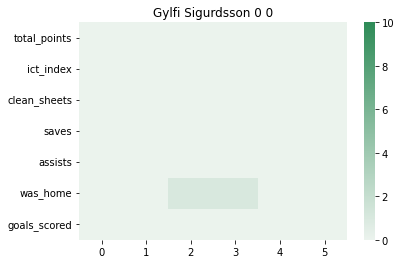

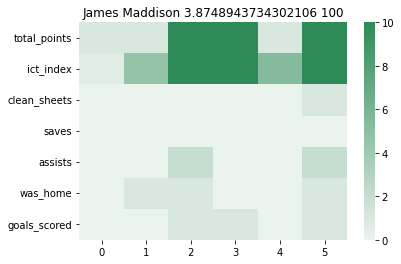

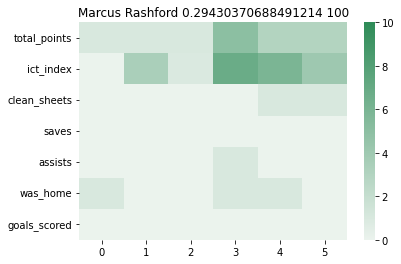

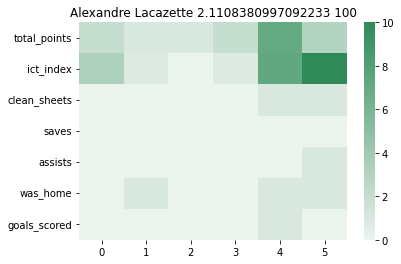

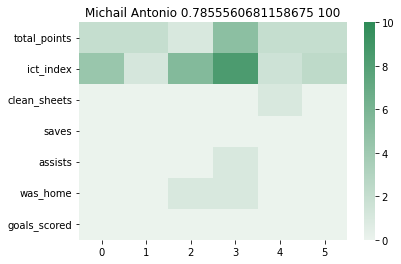

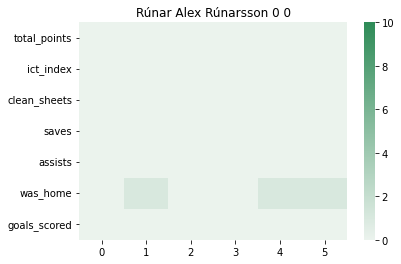

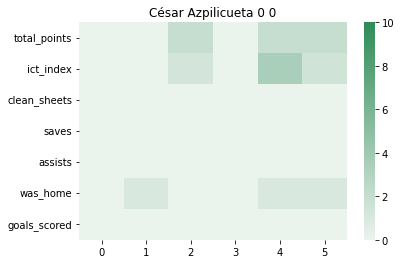

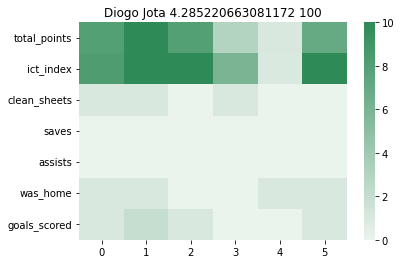

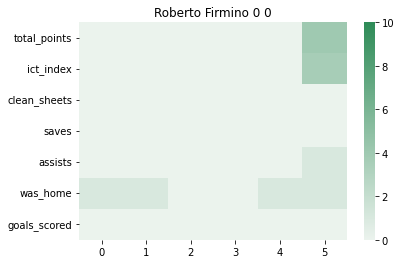

In [6]:
await agent.set_playing_11(current_squad, visualize=True)


## Highlight top performers by position for this week





Goalkeeper
Edouard Mendy


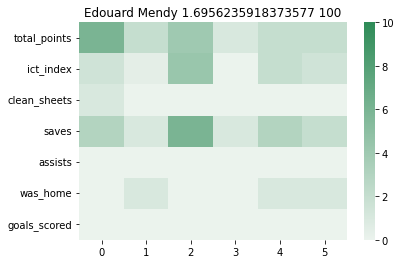

Alisson Ramses Becker


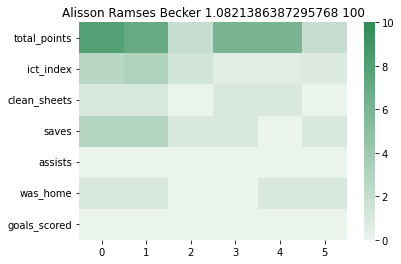

Tim Krul


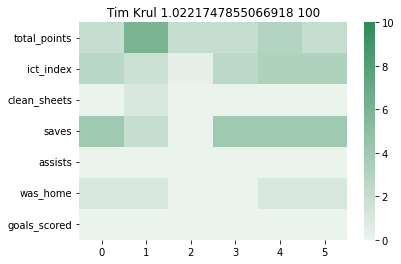

Álvaro Fernández


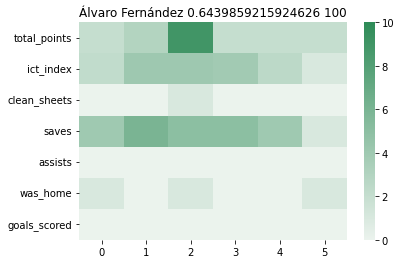

Kasper Schmeichel


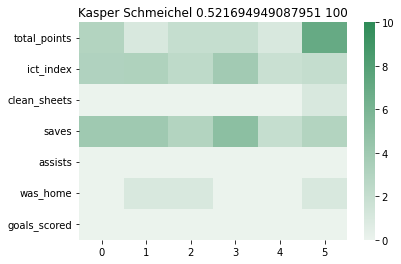










Defender
Marc Guéhi


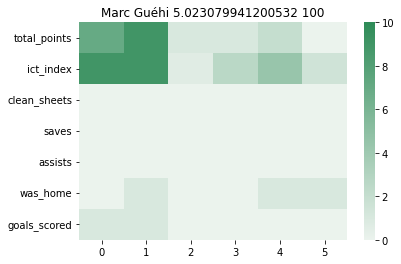

Cheikhou Kouyaté


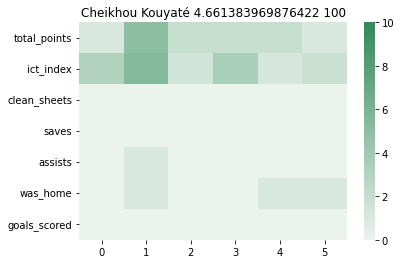

Rico Henry


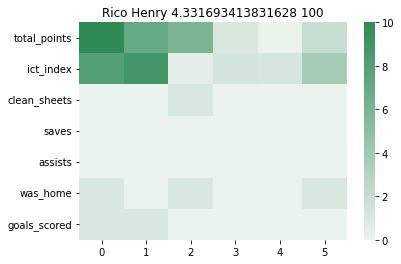

Francisco Femenía Far


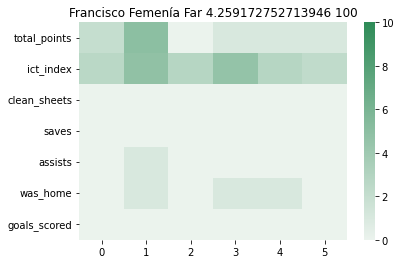

Tyrick Mitchell


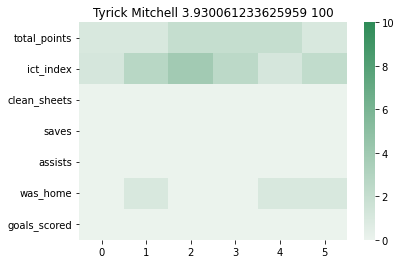










Midfielder
Tom Cleverley


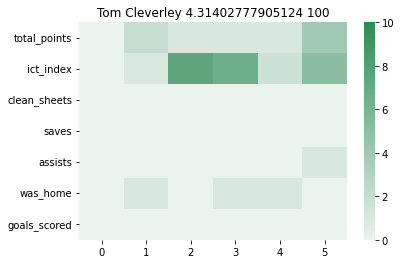

Diogo Jota


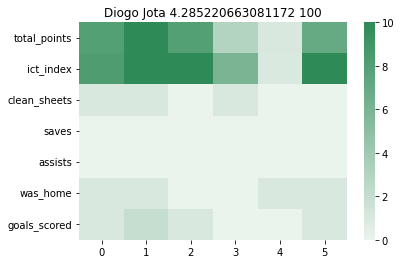

James Maddison


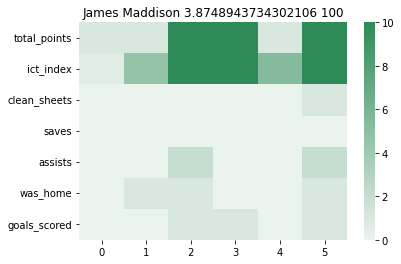

Anthony Gordon


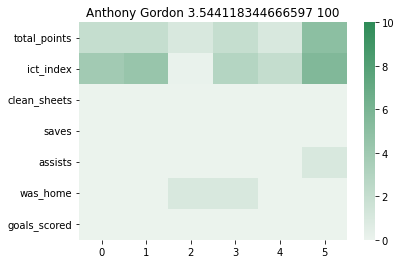

Archie Gray


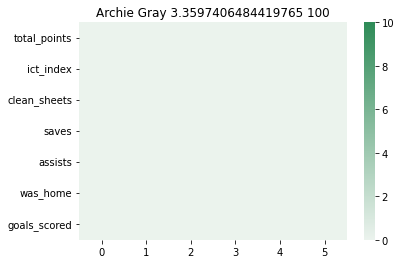










Forward
Odsonne Edouard


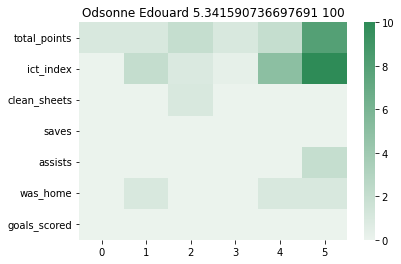

Emmanuel Dennis


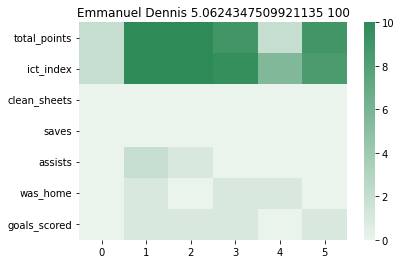

Joshua King


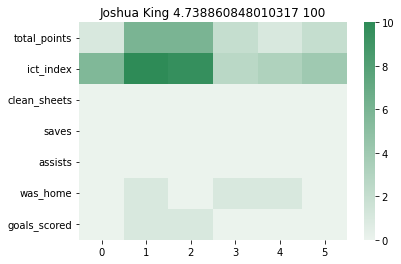

João Pedro Junqueira de Jesus


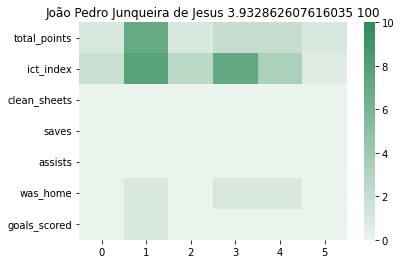

Teemu Pukki


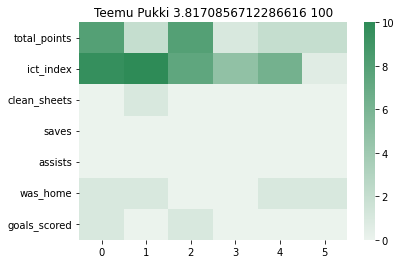

In [7]:
agent.show_top_performers(current_squad + non_squad, k=5)